# Predicting Customer Churn in Telecommunication Operators
Customer turnover refers to a decision made by the customer on the term of business relationship. Customer loyalty and customer turnover always add up to 100%. If a company has a 60% loyalty rate, then customer loss taxes are 40%. According to the 80/20 customer profitability rule, 20% of customers are generating 80% of revenue. Therefore, it is very important to predict the users who are likely to abandon the business relationship and the factors that affect how the customer's decisions.<br>
In this project, I predicted Customer Churn at a Telecommunications Operator using python and frameworks.

In [8]:
# Importing libraries and frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import scipy.stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectKBest

import random

import folium
import os
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
# Importing train dataset
df_train = pd.read_csv("data/projeto4_telecom_treino.csv")
df_test = pd.read_csv("data/projeto4_telecom_teste.csv")

## Exploratory Analysis

In [82]:
# Checking dataset features
print(df_train.shape[1])
df_train.head()

21


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [83]:
# Checking for missing values
print(pd.isna(df_train).any().any())
print(pd.isna(df_test).any().any())
print(pd.isnull(df_train).any().any())
print(pd.isnull(df_test).any().any())

False
False
False
False


In [84]:
# datasets size
print(df_train.shape)
print(df_test.shape)

(3333, 21)
(1667, 21)


In [207]:
df_train.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [85]:
# Compute numerical data summary statistics
df_train_num = df_train[['account_length', 'number_vmail_messages', 'total_day_minutes',
                        'total_day_calls', 'total_day_charge', 'total_eve_minutes', 
                        'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 
                        'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
                        'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']].copy()





df_describe = pd.concat([df_train_num.describe().T,
              df_train_num.mad().rename('mad'),
              df_train_num.skew().rename('skew'),
              df_train_num.kurt().rename('kurt'),
              df_train_num.median().rename('median')
              ], axis=1).T

display(df_describe)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000
mad,31.821440,11.719778,43.523455,15.944943,7.398914,40.469244,15.860332,3.439937,40.410387,15.690341,1.818555,2.184712,1.881093,0.589880,1.052532
skew,0.096606,1.264824,-0.029077,-0.111787,-0.029083,-0.023877,-0.055563,-0.023858,0.008921,0.032500,0.008886,-0.245136,1.321478,-0.245287,1.091359


In [86]:
# Compute categorical data summary statistics
df_train_cat = df_train[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']].copy()
df_train_cat.describe()

,state,area_code,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,106,1655,3010,2411,2850


### Univariate analysis
#### Checking churn variable distribution and proportion

,counts,freqs
categories,,
no,2850,0.855086
yes,483,0.144914


Text(0.5, 1.0, 'Churn barplot')

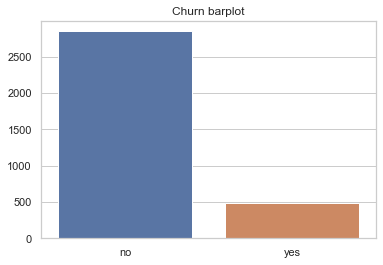

In [214]:
# churn values and proportion 
df = pd.DataFrame(pd.Categorical(df_train.churn).describe())
display(df)
 
# churn variable barplot
sns.set(style="whitegrid") 
sns.barplot(x=['no','yes'], y=df_train.churn.value_counts().values).set_title('Churn barplot')

As noticed on table and graph above, churn feature is unbalanced. About 14% of customers stopped using the telecom service and 85% still using it.

#### Categorical variables
##### State

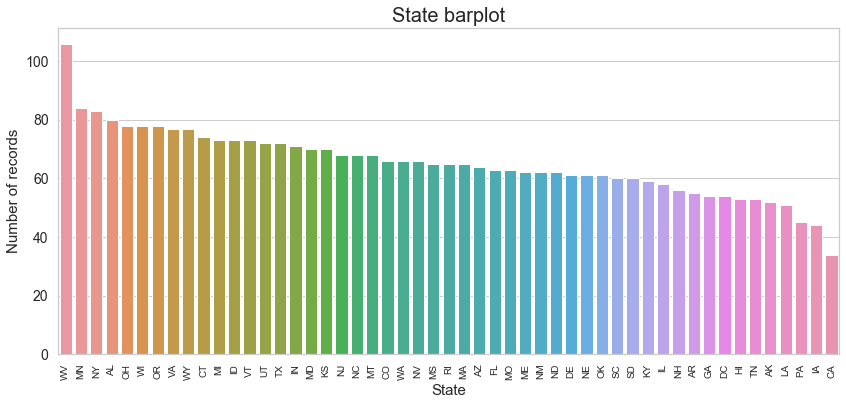

In [232]:
# State variable barplot
plt.figure(figsize=(14,6))

sns.barplot(x=df_train.state.value_counts().index,
            y=df_train.state.value_counts().values)

plt.title('State barplot', size=20)
plt.xlabel('State', size=15)
plt.ylabel('Number of records', size=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.show()

The state with the highest frequency is the West Virginia and the lowest frequency is the California. Other states with a large number of records are New York and Minnesota.<br>
###### Number of records by State shown on the map below:

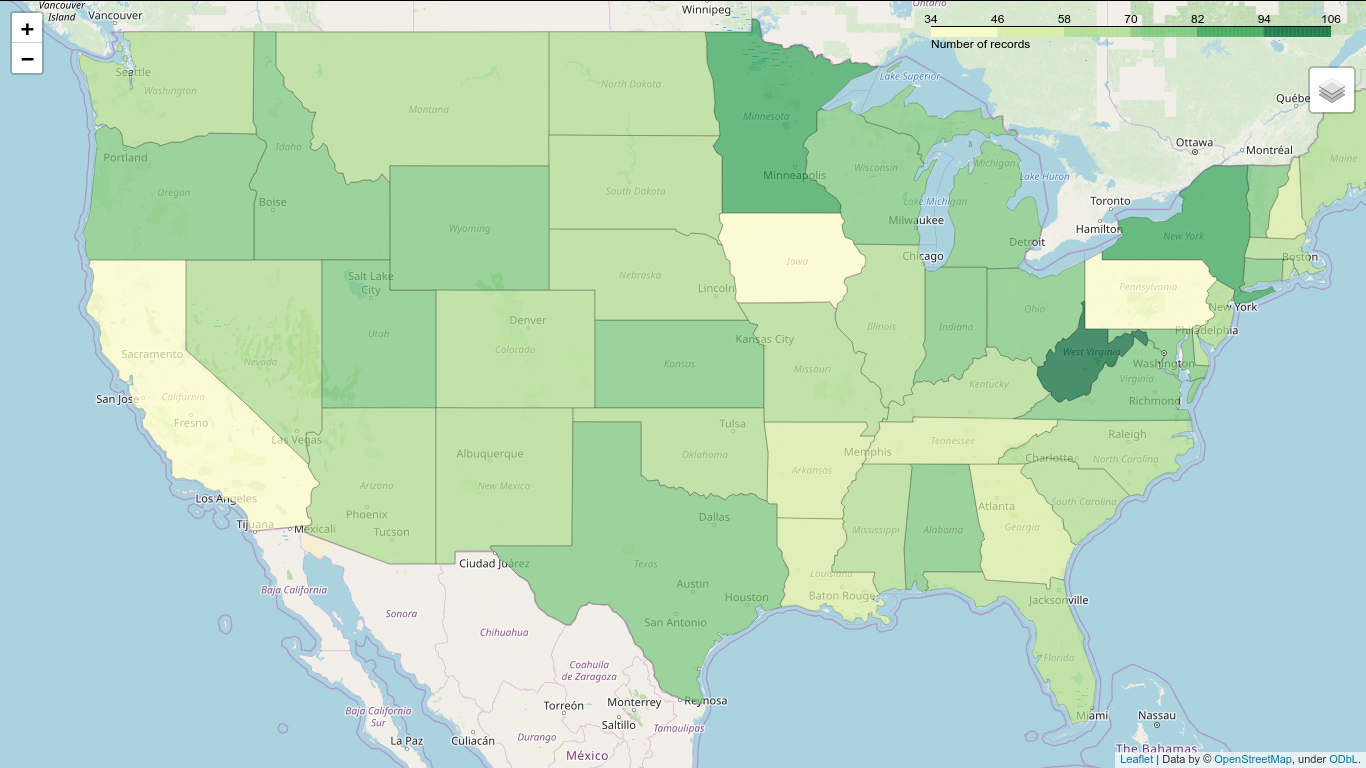

In [9]:
# Map graph
# Load the shape of the zone (US states)
state_geo = os.path.join('', 'us-states.json')
 
# state data
state_data = pd.DataFrame({'state': df_train.state.value_counts().index, 
                           'count': df_train.state.value_counts().values})
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='Number of records by state',
 data=state_data,
 columns=['state', 'count'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of records'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#registers_by_map.html')

display(m)

# Loading map image
# Image(filename='records_by_state.png')

##### Area code

,counts,freqs
categories,,
area_code_408,838,0.251425
area_code_415,1655,0.496550
area_code_510,840,0.252025


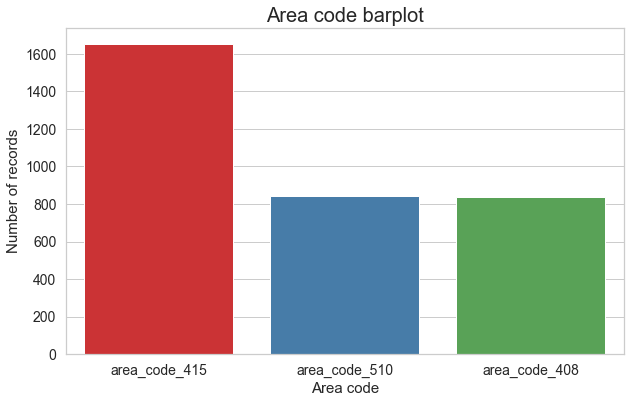

In [27]:
# area_code values and proportion
plt.figure(figsize=(10,6))

df = pd.DataFrame(pd.Categorical(df_train.area_code).describe())
display(df)
 
# area_code variable barplot
sns.set(style="whitegrid") 
sns.barplot(x=df_train.area_code.value_counts().index, 
            y=df_train.area_code.value_counts().values,
           palette='Set1')

plt.title('Area code barplot', size=20)
plt.xlabel('Area code', size=15)
plt.ylabel('Number of records', size=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Code area 415 has the largest number of records.
##### International plan

,counts,freqs
categories,,
no,3010,0.90309
yes,323,0.09691


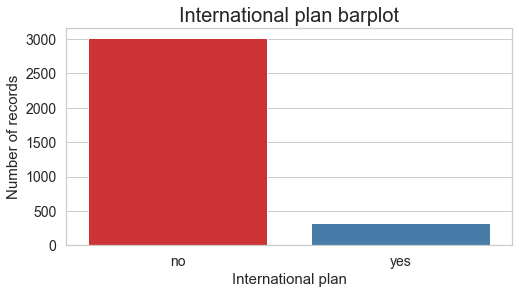

In [29]:
# international_plan values and proportion
plt.figure(figsize=(8,4))

df = pd.DataFrame(pd.Categorical(df_train.international_plan).describe())
display(df)
 
# international_plan variable barplot
sns.set(style="whitegrid") 
sns.barplot(x=df_train.international_plan.value_counts().index, 
            y=df_train.international_plan.value_counts().values,
           palette='Set1')

plt.title('International plan barplot', size=20)
plt.xlabel('International plan', size=15)
plt.ylabel('Number of records', size=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Most customers do not have international plan.
#####  Voice mail plan

,counts,freqs
categories,,
no,2411,0.723372
yes,922,0.276628


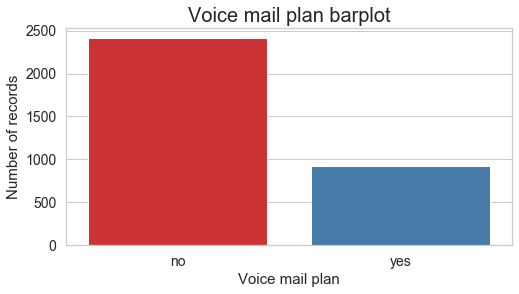

In [30]:
# voice_mail_plan values and proportion
plt.figure(figsize=(8,4))

df = pd.DataFrame(pd.Categorical(df_train.voice_mail_plan).describe())
display(df)
 
# voice_mail_plan variable barplot
sns.set(style="whitegrid") 
sns.barplot(x=df_train.voice_mail_plan.value_counts().index, 
            y=df_train.voice_mail_plan.value_counts().values,
           palette='Set1')

plt.title('Voice mail plan barplot', size=20)
plt.xlabel('Voice mail plan', size=15)
plt.ylabel('Number of records', size=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Most customers do not have voice mail plan.
#### Numerical variables
###### Checking numerical features distributions

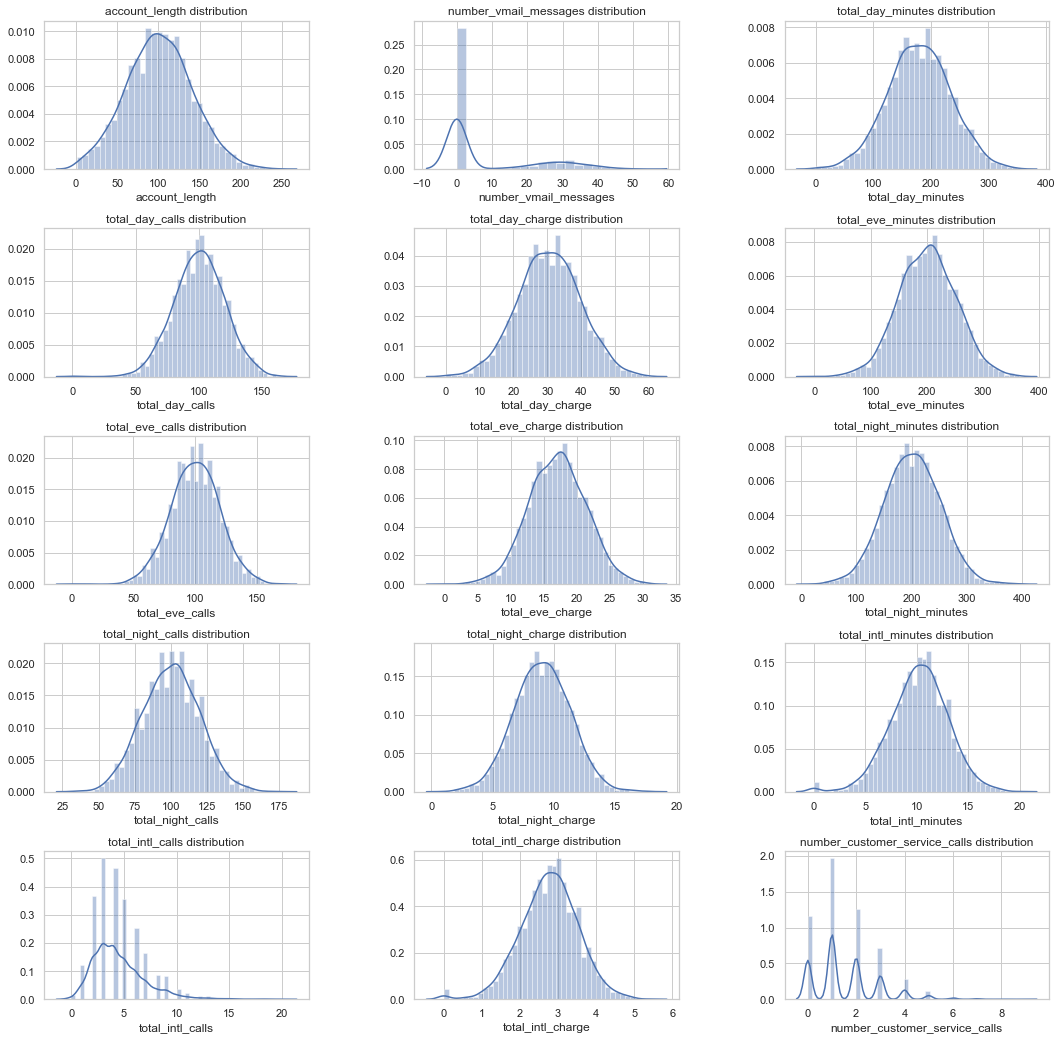

In [40]:
# Features histograms and kde
df = df_train_num.copy()
fig, axs = plt.subplots(ncols=3, nrows=5)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.set_size_inches(18, 18, forward=True)
 
count = 0
 
for i in range(5):
    for j in range(3):
        plt.sca(ax=axs[i][j])
        if count < df.shape[1]:
            col = df.columns[count]
            sns.distplot(df[col]).set_title(col +' distribution')
        else:
            break
             
        count +=1

"account_lenght", " total_day_minutes", " total_day_calls", " total_day_charge", " total_eve_minutes", " total_eve_calls", " total_eve_charge", " total_night_minutes", " total_night_calls", " total_night_charge", " total_intl_minutes", " total_intl_charge" seem to have a normal distribution. "number_vmail_messages" has a bimodal distribution; "total_intl_calls" has a exponential distribution and "number_customer_service_calls" has a multimodal distribution.

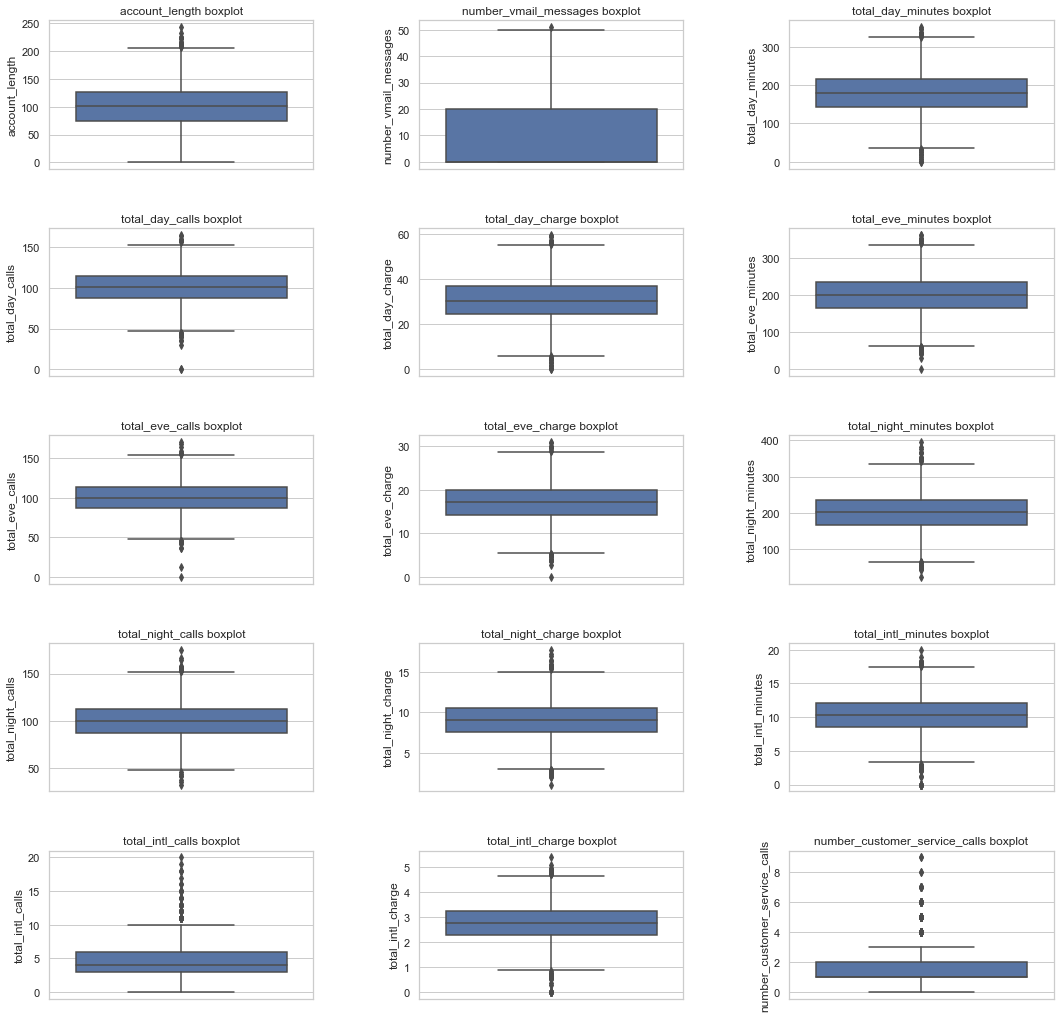

In [42]:
# Features boxplot
df = df_train_num.copy()
fig, axs = plt.subplots(ncols=3, nrows=5)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.set_size_inches(18, 18, forward=True)
 
count = 0
 
for i in range(5):
    for j in range(3):
        plt.sca(ax=axs[i][j])
        if count < df.shape[1]:
            col = df.columns[count]
            sns.boxplot(y=df[col]).set_title(col +' boxplot')
        else:
            break
             
        count +=1

"total_intl_calls" and "number_customer_service" have a large number of outliers.
### Bivariate analysis
###### Checking correlation between numerical variables

(-0.5, 16)

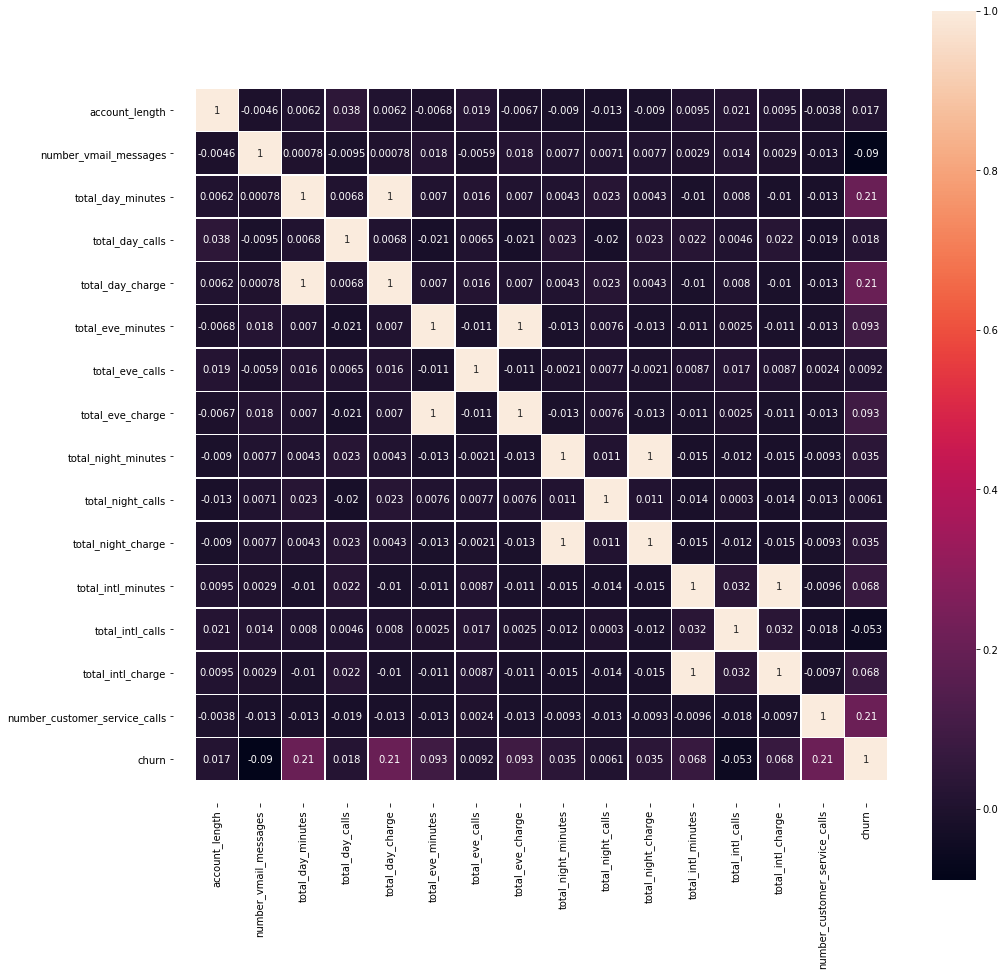

In [16]:
# heat map of correlation values
df = df_train_num.copy()
df['churn'] = df_train.churn.apply(lambda x: 0 if x=='no' else 1)

corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))

g = sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=0.5)

plt.yticks(rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax.set_ylim([len(corr) + 0.5, 0])
ax.set_xlim([-0.5, len(corr)])

There is a high correlation between the following pairs of variables: "total_day_minutes" and "total_day_charge", "total_night_minutes" and "total_night_charge", "total_eve_minutes" and "total_eve_charge", "total_intl_minutes" and "total_intl_charge".
###### Getting numerical features distribuition grouped by target variable (churn)

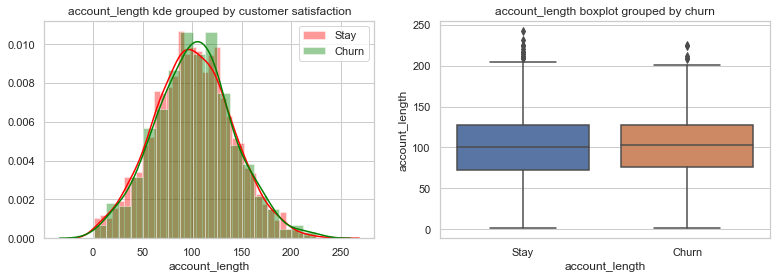

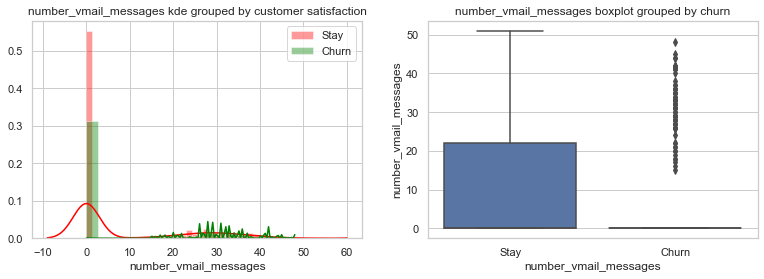

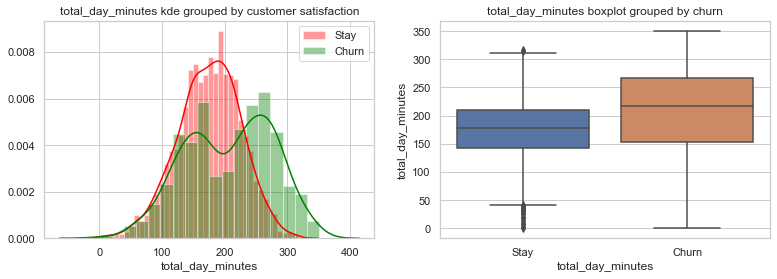

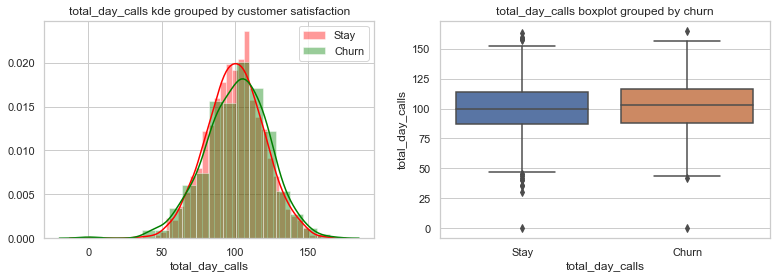

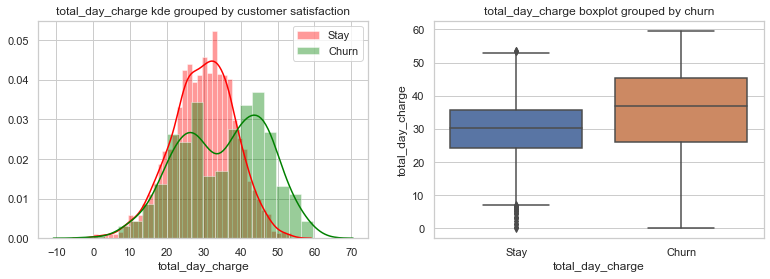

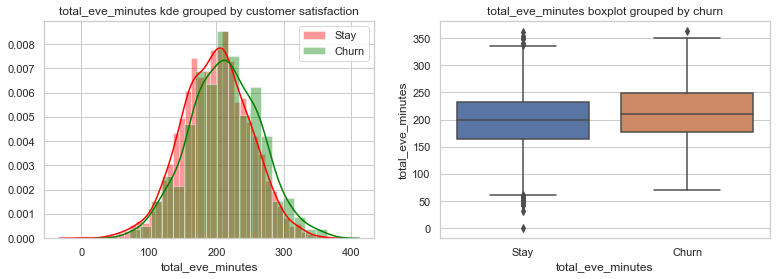

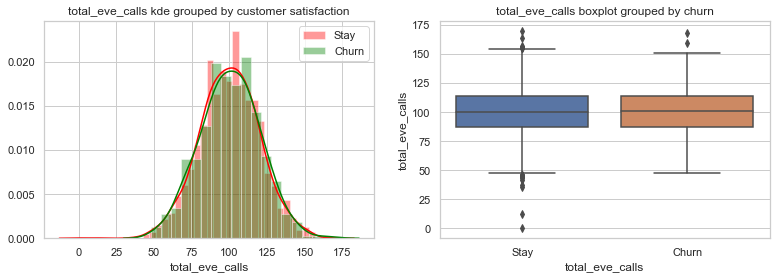

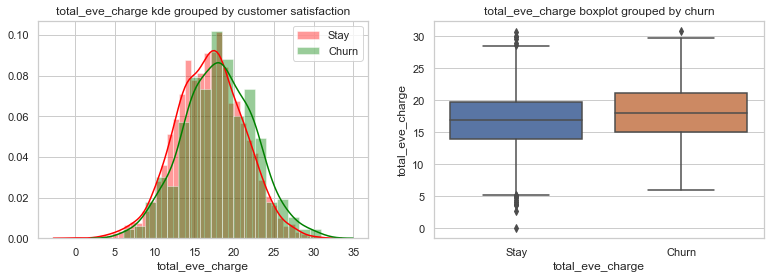

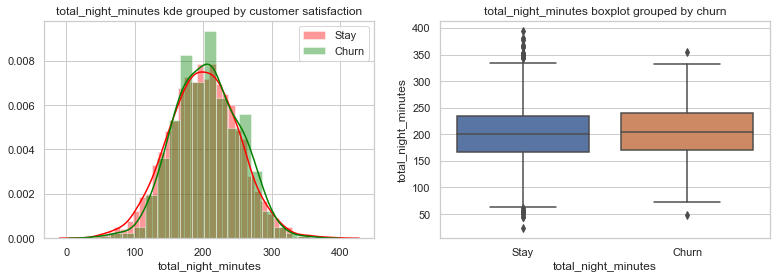

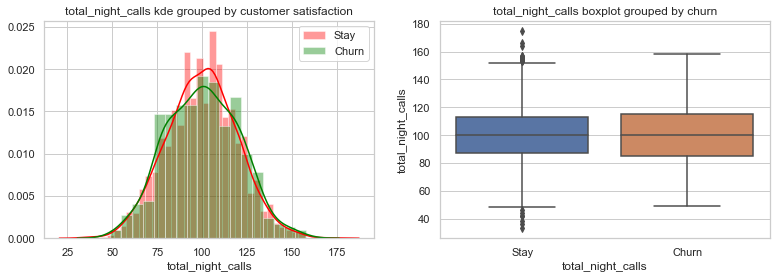

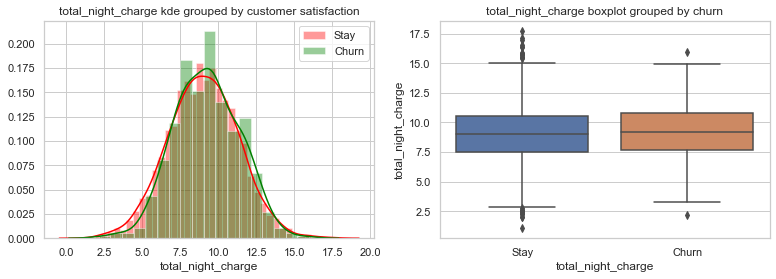

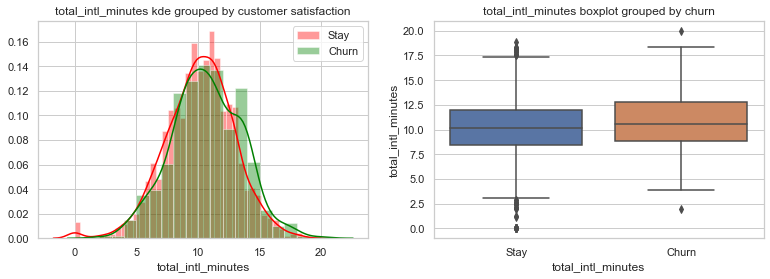

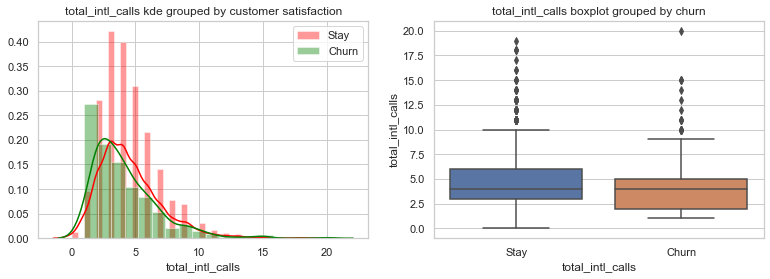

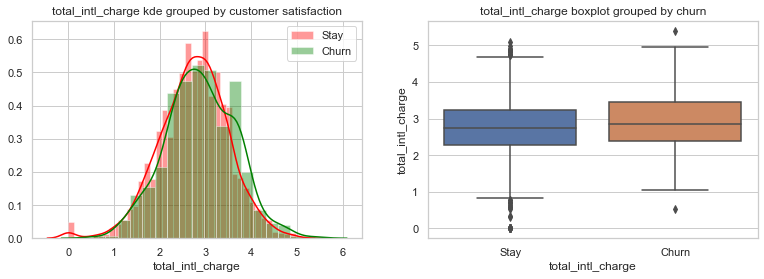

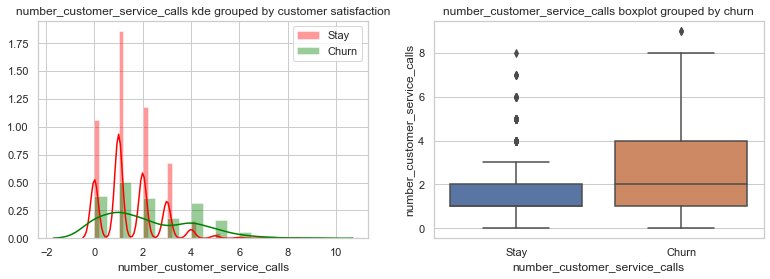

In [50]:
# Getting numerical features distribuition grouped by churn variable
df = df_train_num
df['churn'] = df_train.churn.copy()

for col in df.drop("churn", axis=1).columns:
    fig, axs = plt.subplots(ncols=2)
    fig.set_size_inches(13, 4, forward=True)
    sns.distplot(df[df.churn == 'no'][col], color='red', label='Stay', ax=axs[0], bins = 40)
    sns.distplot(df[df.churn == 'yes'][col], color='green', label='Churn', ax=axs[0], bins = 18)
    axs[0].legend()
    axs[0].set_xlabel(col)
    axs[0].set_title(col + ' kde grouped by customer satisfaction')
    sns.boxplot(y=col, x="churn", data = df, ax=axs[1])
    axs[1].set_xlabel(col)
    axs[1].set_xticklabels(['Stay', 'Churn'])
    axs[1].set_title(col + ' boxplot grouped by churn')
    plt.show()

###### Getting categorical features barplot grouped by churn variable

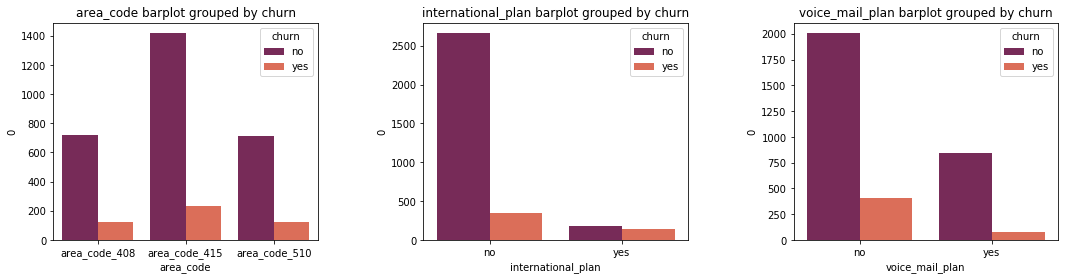

In [87]:
# categorical variables boxplot grouped by churn
df = df_train_cat.drop('state', axis=1)
df['churn'] = df_train.churn.copy()

fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.set_size_inches(18, 4, forward=True)

count = 0


for j in range(3):
    plt.sca(ax=axs[j])
    if count < df.shape[1]:
        col = df.columns[count]
        df_g = pd.DataFrame(df.groupby([col, 'churn']).size()).reset_index()
        sns.barplot(x=col, y=0, hue="churn", data=df_g, palette="rocket")
        axs[j].set_xlabel(col)
        axs[j].set_title(col + ' barplot grouped by churn')
    else:
        break
    count +=1       

Most of the customers who remained do not have an international plan.
###### Churn by state

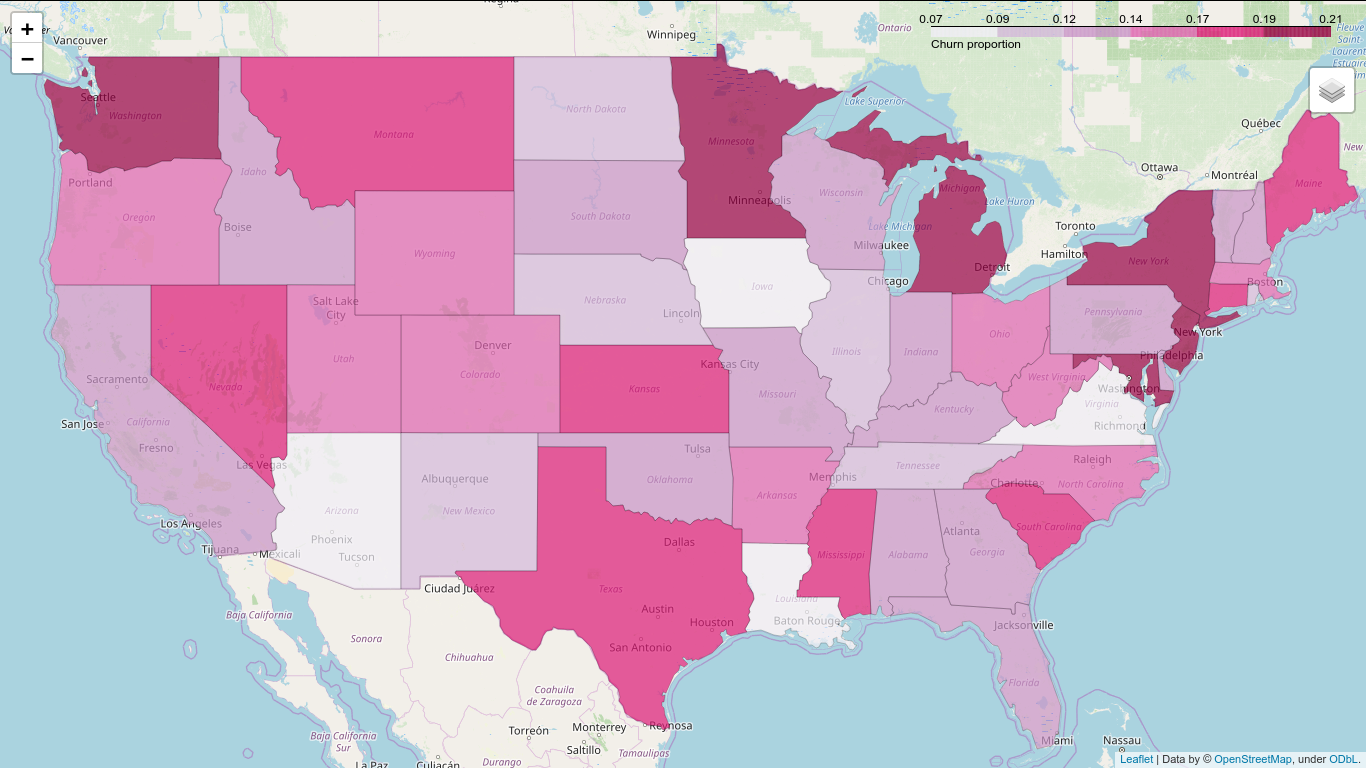

In [11]:
# Map graph exibing churn proportion
# Load the shape of the zone (US states)
state_geo = os.path.join('', 'us-states.json')
 
# state data
state_data = pd.DataFrame({'state': df_train[df_train.churn == 'yes'].state.value_counts().index, 
                           'churn_prop': df_train[df_train.churn == 'yes'].state.value_counts().values/ \
                           df_train.state.value_counts().values})

state_data

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='Churn proportion by state',
 data=state_data,
 columns=['state', 'churn_prop'],
 key_on='feature.id',
 fill_color='PuRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Churn proportion'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#churn_proportion.html')

display(m)

# # Loading map image
# Image(filename='churn_proportion_by_state.png')

###### Checking categorical features

In [88]:
df_new_train_cat = df_train_cat.copy()

# Converting to binary
df_new_train_cat.international_plan = df_new_train_cat.international_plan.apply(lambda x: 0 if x=='no' else 1)
df_new_train_cat.voice_mail_plan = df_new_train_cat.voice_mail_plan.apply(lambda x: 0 if x=='no' else 1)
df_new_train_cat.churn = df_new_train_cat.churn.apply(lambda x: 0 if x=='no' else 1)

dic = {}
count = 1

# Changing state variable
for state in df_new_train_cat.state.unique():
    dic[state] = count
    count += 1
    
df_new_train_cat.state = df_new_train_cat.state.apply(lambda x: dic[x])

# Changing area_code variable
df_new_train_cat.area_code[df_new_train_cat.area_code == 'area_code_408'] = 1
df_new_train_cat.area_code[df_new_train_cat.area_code == 'area_code_510'] = 2
df_new_train_cat.area_code[df_new_train_cat.area_code == 'area_code_415'] = 3

(-0.5, 4)

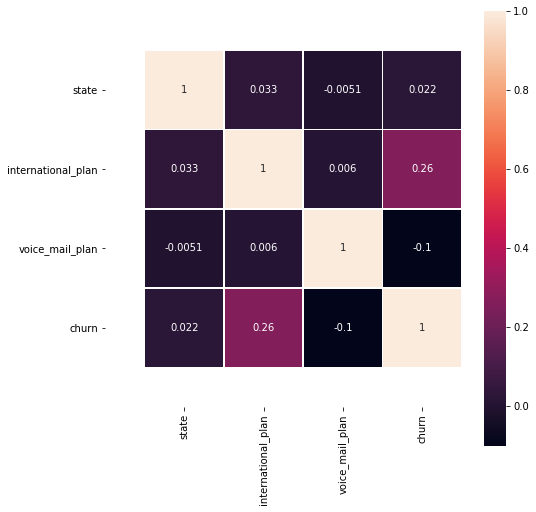

In [89]:
# heat map of correlation values
df = df_new_train_cat.copy()

corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=0.5)

plt.yticks(rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax.set_ylim([len(corr) + 0.5, 0])
ax.set_xlim([-0.5, len(corr)])


### Multivariate analysis

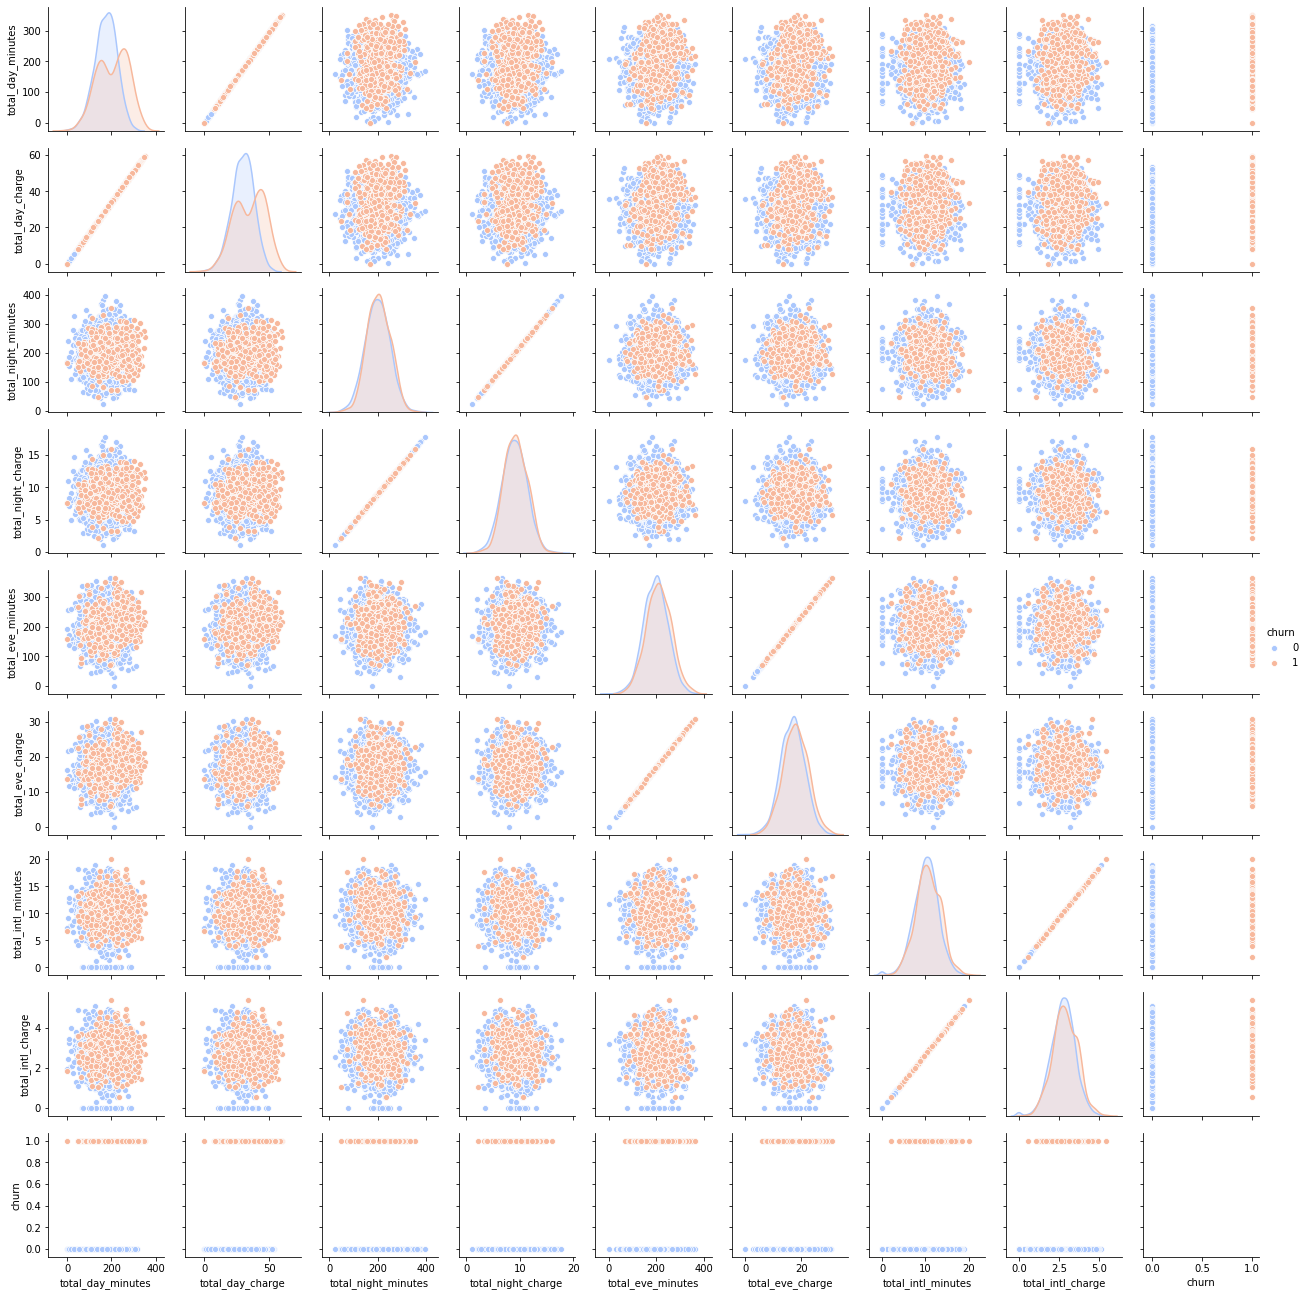

In [17]:
# pairplot matrix grouped by churn variable
df = df_train[["total_day_minutes", "total_day_charge", "total_night_minutes",
                   "total_night_charge", "total_eve_minutes", "total_eve_charge",
                   "total_intl_minutes", "total_intl_charge", "churn"]].copy()

df['churn'] = df_train.churn.apply(lambda x: 0 if x=='no' else 1)

g = sns.pairplot(df, hue='churn', palette='coolwarm')
g.fig.set_size_inches(18,18)

In [90]:
# df_new_train_cat = df_train_cat
df_new_train_cat = df_train_cat.copy()
df_new_train_cat.international_plan = df_new_train_cat.international_plan.apply(lambda x: 0 if x=='no' else 1)
df_new_train_cat.voice_mail_plan = df_new_train_cat.voice_mail_plan.apply(lambda x: 0 if x=='no' else 1)
df_new_train_cat.churn = df_new_train_cat.churn.apply(lambda x: 0 if x=='no' else 1)

In [91]:
df_new_train_cat.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,KS,area_code_415,0,1,0
1,OH,area_code_415,0,1,0
2,NJ,area_code_415,0,0,0
3,OH,area_code_408,1,0,0
4,OK,area_code_415,1,0,0


In [96]:
# Checking relation between categorical variables grouped by churn
values = df_train_cat[['state', 'international_plan', 'voice_mail_plan', 'churn']] \
         .groupby(['international_plan', 'voice_mail_plan', 'churn']).count()


dic = {'international_plan': [],
      'voice_mail_plan': [],
      'churn': [],
      'count': []}


for a_tuple in values.index:
    dic['international_plan'].append(a_tuple[0])
    dic['voice_mail_plan'].append(a_tuple[1])
    dic['churn'].append(a_tuple[2])
    dic['count'].append(values.loc[a_tuple].values[0])
    
display(pd.DataFrame(dic).sort_values(by ='count', ascending=False))

,international_plan,voice_mail_plan,churn,count
0,0,0,0,1878
2,0,1,0,786
1,0,0,1,302
4,1,0,0,130
5,1,0,1,101
6,1,1,0,56
3,0,1,1,44
7,1,1,1,36


## Feature Engineering
Converting train categorical variables to numerical

In [92]:
# converting test categorical variables to numerical
train_data = df_train.drop('id', axis=1).copy()

# Converting to binary
train_data.international_plan = train_data.international_plan.apply(lambda x: 0 if x=='no' else 1)
train_data.voice_mail_plan = train_data.voice_mail_plan.apply(lambda x: 0 if x=='no' else 1)
train_data.churn = train_data.churn.apply(lambda x: 0 if x=='no' else 1)

dic = {}
count = 1

# Changing state variable
for state in train_data.state.unique():
    dic[state] = count
    count += 1
    
train_data.state = train_data.state.apply(lambda x: dic[x])

# Changing area_code variable
train_data.area_code[train_data.area_code == 'area_code_408'] = 1
train_data.area_code[train_data.area_code == 'area_code_510'] = 2
train_data.area_code[train_data.area_code == 'area_code_415'] = 3

# Saving dataset
train_data.to_csv("data/train_data.csv", index=False)

Converting test categorical variables to numerical

In [93]:
# converting test categorical variables to numerical
test_data = df_test.drop('id', axis=1).copy()

# Converting to binary
test_data.international_plan = test_data.international_plan.apply(lambda x: 0 if x=='no' else 1)
test_data.voice_mail_plan = test_data.voice_mail_plan.apply(lambda x: 0 if x=='no' else 1)
test_data.churn = test_data.churn.apply(lambda x: 0 if x=='no' else 1)

dic = {}
count = 1

# Changing state variable
for state in test_data.state.unique():
    dic[state] = count
    count += 1
    
test_data.state = test_data.state.apply(lambda x: dic[x])

# Changing area_code variable
test_data.area_code[test_data.area_code == 'area_code_408'] = 1
test_data.area_code[test_data.area_code == 'area_code_510'] = 2
test_data.area_code[test_data.area_code == 'area_code_415'] = 3

# Saving dataset
test_data.to_csv("data/test_data.csv", index=False)

#### Removing high correlated features

In [94]:
high_corr_features = [col for col in train_data.columns if 'minute' in col]
high_corr_features

less_corr_train_data = train_data.drop(high_corr_features, axis=1).copy()
less_corr_test_data = test_data.drop(high_corr_features, axis=1).copy()

less_corr_train_data.to_csv("data/less_corr_train_data.csv", index=False)
less_corr_test_data.to_csv("data/less_corr_test_data.csv", index=False)

#### Standardizing train and test data

In [97]:
# Applying StandardData to scaled data
# Train data
df = less_corr_train_data.drop(['churn', 'international_plan', 'voice_mail_plan'], axis=1).copy()

StandardData = pd.DataFrame(StandardScaler().fit_transform(df), \
                          columns = df.columns)

stand_train_data = StandardData
stand_train_data['international_plan'] = less_corr_train_data.international_plan.copy()
stand_train_data['voice_mail_plan'] = less_corr_train_data.voice_mail_plan.copy()
stand_train_data['churn'] = less_corr_train_data.churn.copy()

# Test data
df = less_corr_test_data.drop(['churn', 'international_plan', 'voice_mail_plan'], axis=1).copy()

StandardData = pd.DataFrame(StandardScaler().fit_transform(df), \
                          columns = df.columns)

stand_test_data = StandardData
stand_test_data['international_plan'] = less_corr_test_data.international_plan.copy()
stand_test_data['voice_mail_plan'] = less_corr_test_data.voice_mail_plan.copy()
stand_test_data['churn'] = less_corr_test_data.churn.copy()

# Saving data
stand_train_data.to_csv("data/stand_train_data.csv", index=False)
stand_test_data.to_csv("data/stand_test_data.csv", index=False)

#### Applying MinMaxScaler to train and test data

In [98]:
# Applying MinMaxData to scaled data
# Train data
df = less_corr_train_data.drop(['churn', 'international_plan', 'voice_mail_plan'], axis=1).copy()

MinMaxData = pd.DataFrame(MinMaxScaler().fit_transform(df), \
                          columns = df.columns)

minmax_train_data = MinMaxData
minmax_train_data['international_plan'] = less_corr_train_data.international_plan.copy()
minmax_train_data['voice_mail_plan'] = less_corr_train_data.voice_mail_plan.copy()
minmax_train_data['churn'] = less_corr_train_data.churn.copy()

# Test data
df = less_corr_test_data.drop(['churn', 'international_plan', 'voice_mail_plan'], axis=1).copy()

MinMaxData = pd.DataFrame(MinMaxScaler().fit_transform(df), \
                          columns = df.columns)

minmax_test_data = MinMaxData
minmax_test_data['international_plan'] = less_corr_test_data.international_plan.copy()
minmax_test_data['voice_mail_plan'] = less_corr_test_data.voice_mail_plan.copy()
minmax_test_data['churn'] = less_corr_test_data.churn.copy()

# Saving data
minmax_train_data.to_csv("data/minmax_train_data.csv", index=False)
minmax_test_data.to_csv("data/minmax_test_data.csv", index=False)

## Training models
To predict Customer Churn, I chose to use Logistic Regression to get information on whether customers are going to cancel their plan and their likelihood.
### Balancing data

In [115]:
# Defining features
Xo_train, Xo_test, yo_train, yo_test = less_corr_train_data.drop("churn", axis=1).copy(), \
                                       less_corr_test_data.drop("churn", axis=1).copy(), \
                                       less_corr_train_data.churn.copy(), less_corr_test_data.churn.copy()

### Logistic Regression

In [146]:
# LogisticRegression algorithm
lr = LogisticRegression(C=1e5)

# training model
lr.fit(Xo_train, yo_train)

# prediction
churn_prob = lr.predict(Xo_test)
pred = churn_prob.round()

# Evaluating prediction
print (confusion_matrix(yo_test,pred))
print (classification_report(yo_test,pred))

# Save the model as a pickle in a file 
# joblib.dump(lr, 'lr.pkl')

[[1418   25]
 [ 192   32]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1443
           1       0.56      0.14      0.23       224

    accuracy                           0.87      1667
   macro avg       0.72      0.56      0.58      1667
weighted avg       0.84      0.87      0.83      1667



['lr.pkl']

## Trying to optimizate model
### Logistic regression optimization
Selecting most important features

In [149]:
# selecting most important features
k = 9
 
X = less_corr_train_data.drop("churn", axis=1).copy()
y = less_corr_train_data.churn.copy()
  
selectChi2 = SelectKBest(chi2, k=k).fit(X, y)
selectF_classif = SelectKBest(f_classif, k=k).fit(X, y)
 
selected = selectChi2.get_support() & selectF_classif.get_support()
 
features = [col for col, i in zip(X.columns, selected) if i]
 
print("{} most important features: ".format(len(features)), features)

7 most important features:  ['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_intl_calls', 'number_customer_service_calls']


###### Training model using less variables

In [172]:
X_train, y_train = less_corr_train_data[features].copy(), less_corr_train_data.churn.copy()
X_test, y_test = less_corr_test_data[features].copy(), less_corr_test_data.churn.copy()

# LogisticRegression algorithm
lr = LogisticRegression(C=1e5)

# training model
lr.fit(X_train, y_train)

# prediction
churn_prob = lr.predict(X_test)
pred = churn_prob.round()

# Evaluating prediction
print (confusion_matrix(y_test,pred))
print (classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[1410   33]
 [ 184   40]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1443
           1       0.55      0.18      0.27       224

    accuracy                           0.87      1667
   macro avg       0.72      0.58      0.60      1667
weighted avg       0.84      0.87      0.84      1667

0.8698260347930414


###### Using standard deviation dataset

In [171]:
# Defining features
Xsd_train, Xsd_test, ysd_train, ysd_test = stand_train_data.drop("churn", axis=1).copy(), \
                                       stand_test_data.drop("churn", axis=1).copy(), \
                                       stand_train_data.churn.copy(), stand_test_data.churn.copy()

# LogisticRegression algorithm
lr = LogisticRegression(C=1e5)

# training model
lr.fit(Xsd_train, ysd_train)

# prediction
churn_prob = lr.predict(Xsd_test)
pred = churn_prob.round()

# Evaluating prediction
print (confusion_matrix(ysd_test,pred))
print (classification_report(ysd_test,pred))

print(accuracy_score(ysd_test,pred))

# Save the model as a pickle in a file 
joblib.dump(lr, 'lr.pkl')

[[1407   36]
 [ 181   43]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1443
           1       0.54      0.19      0.28       224

    accuracy                           0.87      1667
   macro avg       0.72      0.58      0.61      1667
weighted avg       0.84      0.87      0.84      1667

0.8698260347930414


###### optimization using GridSearch

In [155]:
#Results dataframe
cols = ['Case', 'LogReg']

resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)

resul.loc['Standard'] = [0]
resul.loc['GridSearch'] = [0]
resul.loc['RandomSearch'] = [0]
resul.loc['Hyperopt'] = [0]

In [164]:
#Models creation
lr = LogisticRegression(solver='liblinear')


# Standard parameters
lr.fit(Xsd_train,ysd_train.values.ravel())
resul.iloc[0, 0] = lr.score(Xsd_test,ysd_test)

In [174]:
# GridSearch parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Logistic Regrresion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid = lr_grid

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                             random_state=1)

grid_search = GridSearchCV(estimator=lr, 
              param_grid=grid, n_jobs=-1, cv=cv,  
              scoring='accuracy',error_score=0)

grid_clf_acc = grid_search.fit(Xsd_train, ysd_train)

resul.iloc[1,0] = grid_clf_acc.score(Xsd_test,ysd_test)

# Save the model as a pickle in a file 
joblib.dump(grid_search, 'grid_search.pkl')

['grid_search.pkl']

###### optimization using RandomSearch

In [165]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                             random_state=1)

n_iter_search = 3

random_search = RandomizedSearchCV(lr, param_distributions=grid,
                                   n_iter=n_iter_search, cv=cv)

random_search.fit(Xsd_train, ysd_train)
resul.iloc[2,0] = random_search.score(Xsd_test,ysd_test)

In [166]:
resul.head()

,LogReg
Case,
Standard,0.870426
GridSearch,0.871626
RandomSearch,0.869826
Hyperopt,0


### Final model
GridSearch exibed the best result. <br>
The final model presents accuracy of 0.87. The results are shown in the table below

In [191]:
# Final model
pred = grid_search.predict(Xsd_test).round()

churn_prob = grid_search.predict_proba(Xsd_test)[:,1]

result = pd.DataFrame({'real_churn': ysd_test, 'predicted_churn': pred,
                      'probability': churn_prob})

print (confusion_matrix(ysd_test,pred))
print (classification_report(ysd_test,pred))
print(accuracy_score(ysd_test,pred))

[[1410   33]
 [ 181   43]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1443
           1       0.57      0.19      0.29       224

    accuracy                           0.87      1667
   macro avg       0.73      0.58      0.61      1667
weighted avg       0.84      0.87      0.84      1667

0.871625674865027


In [197]:
display(result)

,real_churn,predicted_churn,probability
0,0,0,0.066634
1,0,0,0.051263
2,0,0,0.239797
3,0,0,0.133904
4,0,0,0.063361
...,...,...,...
1662,0,0,0.183550
1663,1,0,0.402079
1664,0,0,0.051855
1665,0,0,0.031570


In [198]:
result.to_csv("data/result.csv", index=False)